# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from  pprint import  pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#print(cities)

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#url = f"https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}&q="
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []
city_lat=[] 
city_lng=[]
city_max_temp=[]
city_humidity=[]
city_clouds=[]
city_wind=[]
city_country=[]
city_date=[]


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url =query_url + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get( query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response["coord"]["lat"]
        city_lng = city_weather_response["coord"]["lon"]
        city_max_temp = city_weather_response["main"]["temp_max"]
        city_humidity =city_weather_response ["main"]["humidity"]
        city_clouds = city_weather_response["clouds"]["all"]
        city_wind = city_weather_response["wind"]["speed"]
        city_country = city_weather_response["sys"]["country"]
        city_date = city_weather_response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | mar del plata
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | minab
Processing Record 6 of Set 1 | dingle
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 10 of Set 1 | qaanaaq
Processing Record 11 of Set 1 | alofi
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | mapiripan
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | ginir
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | provideniya

Processing Record 39 of Set 4 | saint george
Processing Record 40 of Set 4 | okato
Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | panguna
Processing Record 43 of Set 4 | whitehorse
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | stornoway
Processing Record 47 of Set 4 | tonantins
Processing Record 48 of Set 4 | turayf
Processing Record 49 of Set 4 | flin flon
Processing Record 0 of Set 5 | thinadhoo
Processing Record 1 of Set 5 | dwarka
Processing Record 2 of Set 5 | bari sadri
Processing Record 3 of Set 5 | hunza
City not found. Skipping...
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 6 of Set 5 | loukhi
Processing Record 7 of Set 5 | quetzaltepec
City not found. Skipping...
Processing Record 8 of Set 5 | zeya
Processing Record 9 of Set 5 | kokopo
Processing Record 10 of Set 5 | ponta do sol
Processing Recor

Processing Record 27 of Set 8 | casablanca
Processing Record 28 of Set 8 | dongsheng
Processing Record 29 of Set 8 | taitung
Processing Record 30 of Set 8 | san diego
Processing Record 31 of Set 8 | atbasar
Processing Record 32 of Set 8 | charagua
Processing Record 33 of Set 8 | alyangula
Processing Record 34 of Set 8 | hearst
Processing Record 35 of Set 8 | samfya
Processing Record 36 of Set 8 | olinda
Processing Record 37 of Set 8 | kuandian
Processing Record 38 of Set 8 | meyungs
City not found. Skipping...
Processing Record 39 of Set 8 | walvis bay
Processing Record 40 of Set 8 | half moon bay
Processing Record 41 of Set 8 | paramonga
Processing Record 42 of Set 8 | langarud
Processing Record 43 of Set 8 | byron bay
Processing Record 44 of Set 8 | tigil
Processing Record 45 of Set 8 | bara
Processing Record 46 of Set 8 | teeli
Processing Record 47 of Set 8 | agva
City not found. Skipping...
Processing Record 48 of Set 8 | bhadrapur
Processing Record 49 of Set 8 | altoona
Processing

Processing Record 12 of Set 12 | palu
Processing Record 13 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 14 of Set 12 | hervey bay
Processing Record 15 of Set 12 | kharhial
Processing Record 16 of Set 12 | kindersley
Processing Record 17 of Set 12 | arrecife
Processing Record 18 of Set 12 | viligili
City not found. Skipping...
Processing Record 19 of Set 12 | vyazma
Processing Record 20 of Set 12 | kishi
Processing Record 21 of Set 12 | parabel
Processing Record 22 of Set 12 | awjilah
Processing Record 23 of Set 12 | sakakah
Processing Record 24 of Set 12 | jiaonan
Processing Record 25 of Set 12 | shimoda
Processing Record 26 of Set 12 | mahibadhoo
Processing Record 27 of Set 12 | erzin
Processing Record 28 of Set 12 | villacarrillo
Processing Record 29 of Set 12 | gunjur
Processing Record 30 of Set 12 | kaduy
Processing Record 31 of Set 12 | guerrero negro
Processing Record 32 of Set 12 | bourail
Processing Record 33 of Set 12 | mayo
Processing Record 34 of Set 1

In [7]:
print(city_data)

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

[{'City': 'ushuaia', 'Lat': -54.8, 'Lng': -68.3, 'Max Temp': 6.79, 'Humidity': 70, 'Cloudiness': 40, 'Wind Speed': 2.06, 'Country': 'AR', 'Date': 1670291287}, {'City': 'atuona', 'Lat': -9.8, 'Lng': -139.0333, 'Max Temp': 25.39, 'Humidity': 74, 'Cloudiness': 36, 'Wind Speed': 6.43, 'Country': 'PF', 'Date': 1670291423}, {'City': 'mar del plata', 'Lat': -38.0023, 'Lng': -57.5575, 'Max Temp': 23.01, 'Humidity': 74, 'Cloudiness': 0, 'Wind Speed': 7.6, 'Country': 'AR', 'Date': 1670291139}, {'City': 'port alfred', 'Lat': -33.5906, 'Lng': 26.891, 'Max Temp': 13.43, 'Humidity': 94, 'Cloudiness': 100, 'Wind Speed': 0.89, 'Country': 'ZA', 'Date': 1670291424}, {'City': 'minab', 'Lat': 27.1467, 'Lng': 57.0801, 'Max Temp': 22.15, 'Humidity': 59, 'Cloudiness': 99, 'Wind Speed': 1.55, 'Country': 'IR', 'Date': 1670291425}, {'City': 'dingle', 'Lat': 10.9995, 'Lng': 122.6711, 'Max Temp': 28.07, 'Humidity': 75, 'Cloudiness': 29, 'Wind Speed': 6.3, 'Country': 'PH', 'Date': 1670291427}, {'City': 'hermanus',

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data

city_data_df.index.name='City_ID'
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.79,70,40,2.06,AR,1670291287
1,atuona,-9.8000,-139.0333,25.39,74,36,6.43,PF,1670291423
2,mar del plata,-38.0023,-57.5575,23.01,74,0,7.60,AR,1670291139
3,port alfred,-33.5906,26.8910,13.43,94,100,0.89,ZA,1670291424
4,minab,27.1467,57.0801,22.15,59,99,1.55,IR,1670291425


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.79,70,40,2.06,AR,1670291287
1,atuona,-9.8000,-139.0333,25.39,74,36,6.43,PF,1670291423
2,mar del plata,-38.0023,-57.5575,23.01,74,0,7.60,AR,1670291139
3,port alfred,-33.5906,26.8910,13.43,94,100,0.89,ZA,1670291424
4,minab,27.1467,57.0801,22.15,59,99,1.55,IR,1670291425


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

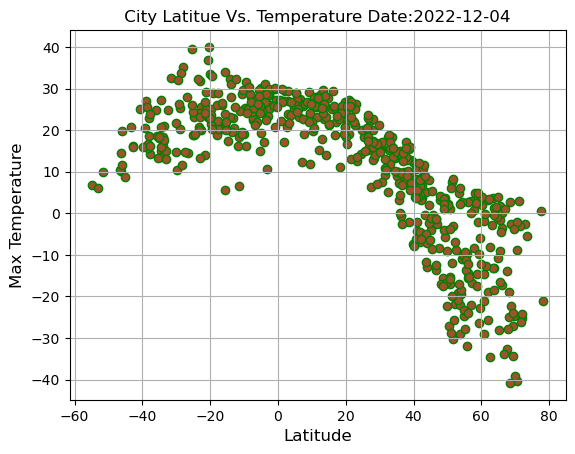

In [11]:
# Build scatter plot for latitude vs. temperature

lat=city_data_df["Lat"]
temp=city_data_df["Max Temp"]
plt.scatter(lat,temp,marker="o",edgecolors="green",facecolors="sienna")

# Incorporate the other graph properties
plt.title(" City Latitue Vs. Temperature Date:2022-12-04 ")
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Max Temperature",fontsize=12)
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

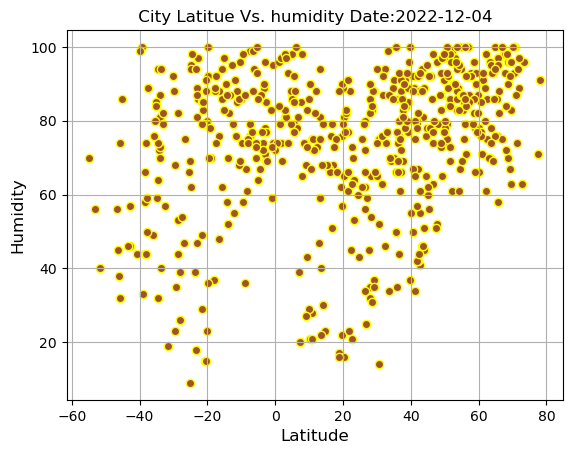

In [12]:
# Build the scatter plots for latitude vs. humidity
humidity=city_data_df["Humidity"]
plt.scatter(lat,humidity,marker="o",edgecolors="yellow",facecolors="sienna")

# Incorporate the other graph properties
plt.title(" City Latitue Vs. humidity Date:2022-12-04 ")
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Humidity",fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

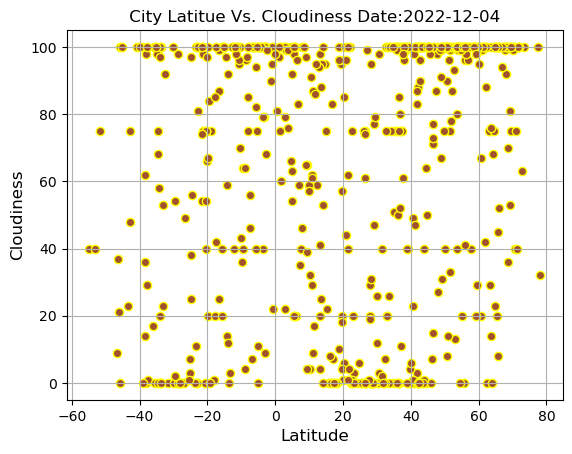

In [13]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness=city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(lat,cloudiness,marker="o",edgecolors="yellow",facecolors="sienna")

plt.title(" City Latitue Vs. Cloudiness Date:2022-12-04 ")
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Cloudiness",fontsize=12)
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

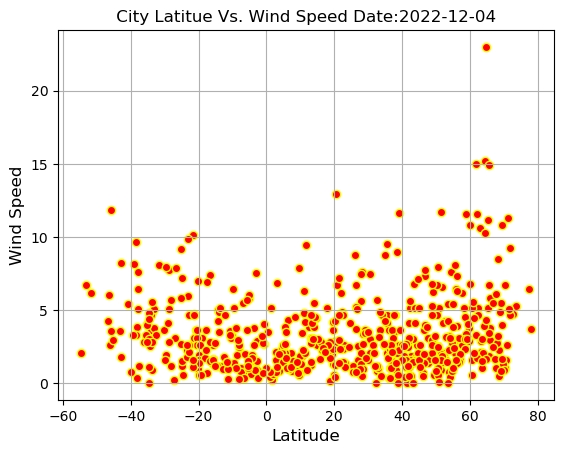

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind=city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat,wind,marker="o",edgecolors="yellow",facecolors="red")
plt.title(" City Latitue Vs. Wind Speed Date:2022-12-04 ")
plt.xlabel("Latitude",fontsize=12)
plt.ylabel("Wind Speed",fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def liner_reg(x , y ):
   
    # get liner regression value 
    slope,intercept,rvalue,pvalue,stderror = linregress(x ,y)
    # u= m * x + b
    regress_values = slope * x + intercept 
    
    # create line equation 
    line_eq = "y=" +str(round(slope,2) +" x +" + str(round(intercept,2)))
    
    # plot liner 
    plt.plot(x,regress_values ,color ="red")
    
    # return valuess
    
    return line_eq

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northen_at = city_data_df.loc[city_data_df["Lat"] >= 0,:]
northern_hemi_df=pd.DataFrame(northen_at)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,minab,27.1467,57.0801,22.15,59,99,1.55,IR,1670291425
5,dingle,10.9995,122.6711,28.07,75,29,6.30,PH,1670291427
7,cherskiy,68.7500,161.3000,-22.41,90,100,2.27,RU,1670291433
8,qaanaaq,77.4840,-69.3632,0.54,71,100,6.41,GL,1670291435
11,mapiripan,2.8892,-72.1256,23.98,81,22,2.14,CO,1670291442


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_at = city_data_df.loc[city_data_df["Lat"] < 0,:]
southern_hemi_df=pd.DataFrame(southern_at)


# Display sample data
southern_hemi_df.head( )

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.79,70,40,2.06,AR,1670291287
1,atuona,-9.8000,-139.0333,25.39,74,36,6.43,PF,1670291423
2,mar del plata,-38.0023,-57.5575,23.01,74,0,7.60,AR,1670291139
3,port alfred,-33.5906,26.8910,13.43,94,100,0.89,ZA,1670291424
6,hermanus,-34.4187,19.2345,14.92,72,58,2.53,ZA,1670291433


###  Temperature vs. Latitude Linear Regression Plot

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('float64'), dtype('<U4')) -> None

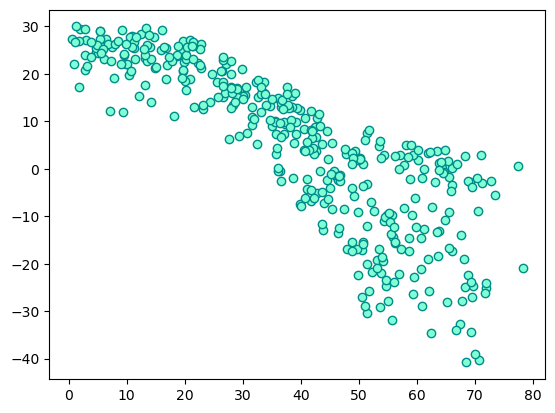

In [19]:
x_values=northern_hemi_df["Lat"].astype(float)
y_values=northern_hemi_df["Max Temp"].astype(float)

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")

liner_reg(x_values,y_values)

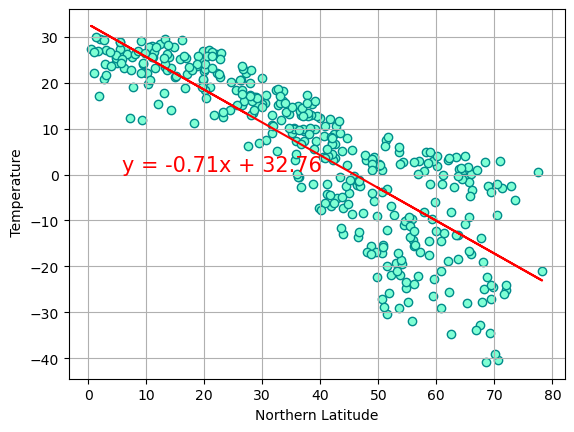

In [21]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Northern Latitude')
plt.ylabel(" Temperature")
plt.grid()

plt.savefig("../output_data/northern latvstem liner.png")
plt.show()





The r-squared is: 0.21286533555725173


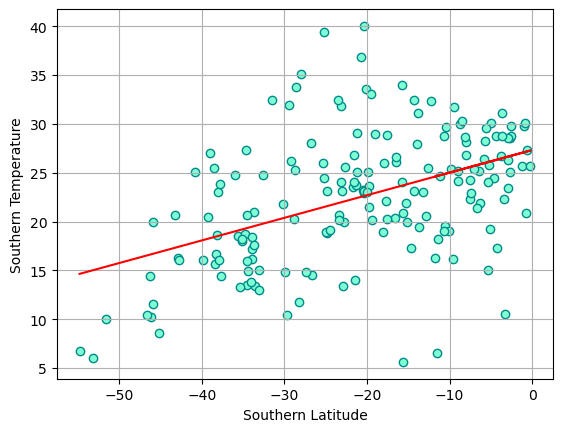

In [22]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Southern Latitude')
plt.ylabel("Southern Temperature")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern latvstem liner.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1127395326023324


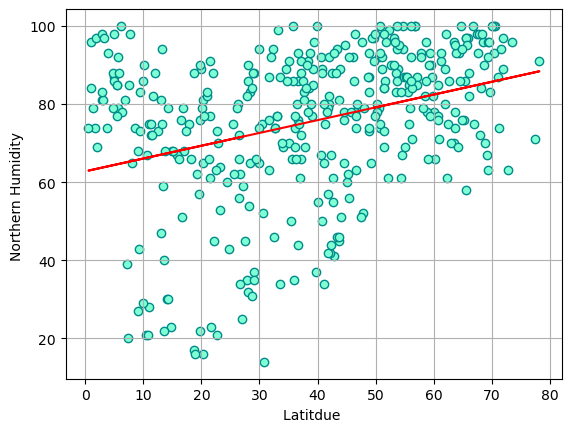

In [24]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitdue ')
plt.ylabel("Northern Humidity ")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern latvshumidity liner.png")
plt.show()


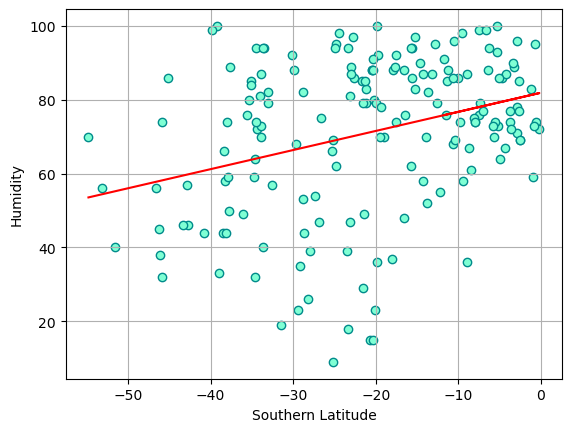

In [25]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Southern Latitude')
plt.ylabel("Humidity")
plt.grid()

plt.savefig("../output_data/Southern latvsHumidity liner.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0675439644570171


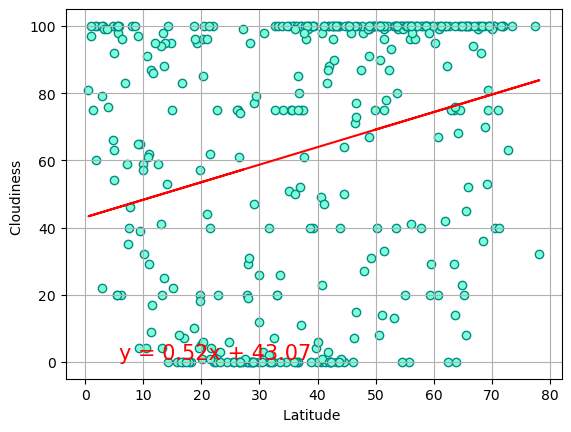

In [27]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude ')
plt.ylabel("Cloudiness ")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern latvscloudiness liner.png")
plt.show()

The r-squared is: 0.07742078406256074


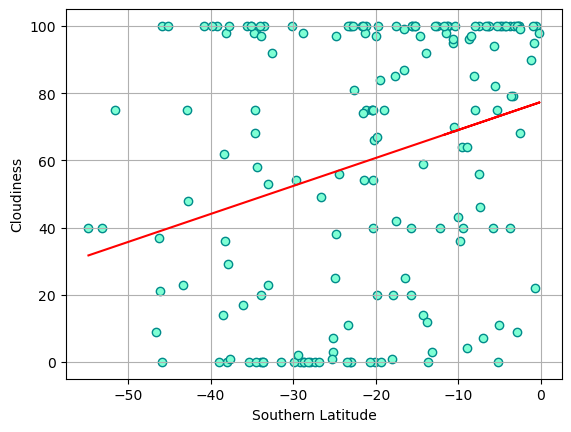

In [28]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Southern Latitude')
plt.ylabel("Cloudiness")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/Southern latvsCloudiness liner.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.05929475034029575


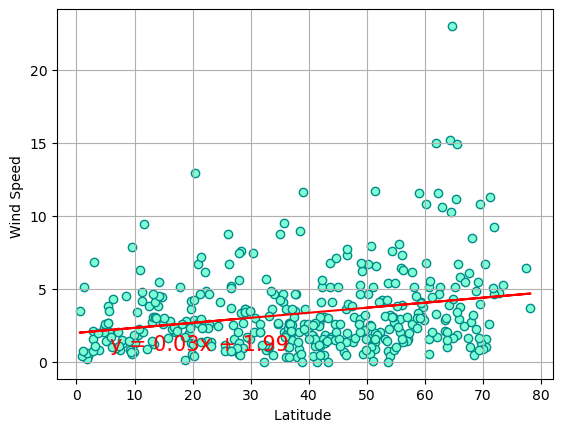

In [30]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude ')
plt.ylabel("Wind Speed ")
plt.grid()
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../output_data/northern lat vs Wind Speed liner.png")
plt.show()

In [31]:

# YOUR CODE HERE

The r-squared is: 0.11811141688821374


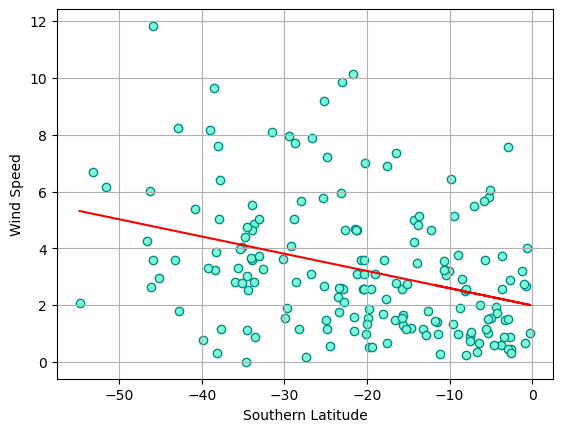

In [32]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]

plt.scatter(x_values,y_values,marker="o",facecolors="aquamarine",edgecolors="darkcyan")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Southern Latitude')
plt.ylabel("Wind Speed")
plt.grid()
print(f"The r-squared is: {rvalue**2}")

plt.savefig("../output_data/Southern latvsWind Speed liner.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE